# Juan's olive grove - temperature

The south of Spain (andalusia) is famous for its olive groves and olive oil production. However olive trees are sensitive to climate change. Changes in temperature and precipitation can cause changing flowering times (Gabaldón-Leal et al., 2017), reduce production and may even result in abandoned olive groves when farmers are forced to move to different areas. Olive production is a culturally and economically crucial industry to the region therefore adaptation is necessary. Adaptation measures include but are not limited to: different and more precise irrigation practices (Lorite et al., 2018), change of location (Ropero, Rumí, & Aguilera, 2018), change of crop.

 

In this case study we will take a look at how climate data can help two olive grove owners, Juan and Carlos, in their olive farming. 

Farmer Juan has an olive grove between Granada and Malaga (lat:37 lon:-4). The specific breed of olive tree in his grove study cannot flower if the temperature in reaches above 27 degrees. With the Toolbox you can plot a graph of the temperature fluctuations from 2008 to 2017. 


<img src="https://www.freeworldmaps.net/europe/spain/andalusia/andalusia-map.jpg" />

# Question

### How many years did the mean daily temperature exceed 27°C in the period of 2008-2017 at Juan's olive grove?

# Retrieve ERA-5 reanalysis

- 2 meter temperature (K)
- hourly data
- select a small area to reduce the amount of data downloaded

In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': '2m_temperature',
        'year': [
            '2008', '2009', '2010',
            '2011', '2012', '2013',
            '2014', '2015', '2016',
            '2017',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
       'area': [37.5, -4.5, 36.5, -3.5], # North, West, South, East. Default: global
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'format': 'netcdf',
    },
    'era5_t2m_2008-2017_hourly.nc')

2020-02-28 16:16:58,278 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2020-02-28 16:16:59,518 INFO Request is queued
2020-02-28 16:17:00,561 INFO Request is running
2020-02-28 16:29:18,912 INFO Request is queued
2020-02-28 16:31:19,187 INFO Request is running
2020-02-28 18:27:33,231 INFO Request is completed
2020-02-28 18:27:33,234 INFO Downloading http://136.156.133.36/cache-compute-0010/cache/data0/adaptor.mars.internal-1582907395.5085666-22714-1-5b803ab4-b129-4280-8355-5dbfadd8353b.nc to era5_t2m_2008-2017_hourly.nc (4.5M)
2020-02-28 18:27:33,900 INFO Download rate 6.8M/s   


Result(content_length=4735392,content_type=application/x-netcdf,location=http://136.156.133.36/cache-compute-0010/cache/data0/adaptor.mars.internal-1582907395.5085666-22714-1-5b803ab4-b129-4280-8355-5dbfadd8353b.nc)

# Compute daily mean from hourly data

- One single location (longitude: -4, latitude: 37) e.g. take the nearest grid point
- Plot time series from 2008 to 2017

In [46]:
import matplotlib.pyplot as plt
import xarray as xr
import cftime
%matplotlib inline

In [82]:
filename = 'era5_t2m_2008-2017_hourly.nc'
dset = xr.open_dataset(filename, decode_times=True, use_cftime=True)

In [83]:
dset

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 5, time: 87672)
Coordinates:
  * longitude  (longitude) float32 -4.5 -4.25 -4.0 -3.75 -3.5
  * latitude   (latitude) float32 37.5 37.25 37.0 36.75 36.5
  * time       (time) object 2008-01-01 00:00:00 ... 2017-12-31 23:00:00.13
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-02-28 18:25:46 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

## Daily mean

In [49]:
dset_daily_mean = dset.sel(latitude=37.0, longitude=-4, method="nearest").resample(time='1D').mean()


In [50]:
dset_daily_mean.time

<xarray.DataArray 'time' (time: 3653)>
array([cftime.DatetimeGregorian(2008-01-01 00:00:00),
       cftime.DatetimeGregorian(2008-01-02 00:00:00),
       cftime.DatetimeGregorian(2008-01-03 00:00:00), ...,
       cftime.DatetimeGregorian(2017-12-29 00:00:00),
       cftime.DatetimeGregorian(2017-12-30 00:00:00),
       cftime.DatetimeGregorian(2017-12-31 00:00:00)], dtype=object)
Coordinates:
  * time       (time) object 2008-01-01 00:00:00 ... 2017-12-31 00:00:00
    longitude  float32 -4.0
    latitude   float32 37.0

## Plot timeserie

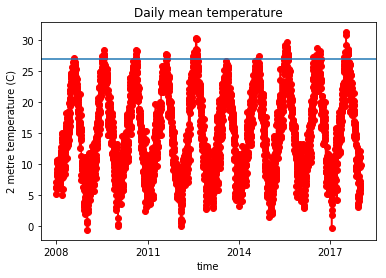

In [51]:
(dset_daily_mean['t2m']-273.15).plot.line('ro-')
plt.ylabel("2 metre temperature (C)")
plt.title("Daily mean temperature")
plt.axhline(y=27)

## Compute number of days where mean 2m temperature > 27C 

In [52]:
dset_daily_mean_greater_27 = dset_daily_mean.where(dset_daily_mean['t2m'] > 27 + 273.15).groupby('time.year').count()

## Plot

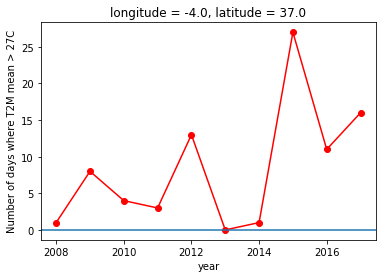

In [62]:
dset_daily_mean_greater_27['t2m'].plot.line('ro-')
plt.ylabel("Number of days where T2M mean > 27C")
plt.axhline(y=0)

In [54]:
dset_daily_mean_greater_27['t2m']

<xarray.DataArray 't2m' (year: 10)>
array([ 1,  8,  4,  3, 13,  0,  1, 27, 11, 16])
Coordinates:
    longitude  float32 -4.0
    latitude   float32 37.0
  * year       (year) int64 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017

## Count number of years where daily mean > 27C

In [70]:
nyears = dset_daily_mean_greater_27.where(dset_daily_mean_greater_27['t2m']>0).count()
print("In the period of 2008-2017, the mean daily temperature exceeded 27C ", nyears['t2m'].values, " years at Juan's olive grove")

In the period of 2008-2017, the mean daily temperature exceeded 27C  9  years at Juan's olive grove


## Same using cdo

- you can use [cdo](https://code.mpimet.mpg.de/projects/cdo) to compute daily mean values

In [ ]:
!cdo -daymean era5_t2m_2008-2017_hourly.nc era5_t2m_2008-2017_daily_mean.nc

In [56]:
filename = 'era5_t2m_2008-2017_daily_mean.nc'
dset = xr.open_dataset(filename, decode_times=True, use_cftime=True)

In [57]:
dset_daily_mean = dset.sel(latitude=37.0, longitude=-4, method="nearest")

In [58]:
dset_daily_mean_greater_27 = dset_daily_mean.where(dset_daily_mean['t2m'] > 27 + 273.15).groupby('time.year').count()

In [59]:
dset_daily_mean_greater_27

<xarray.Dataset>
Dimensions:    (bnds: 2, year: 10)
Coordinates:
    longitude  float32 -4.0
    latitude   float32 37.0
  * year       (year) int64 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (year, bnds) int64 1 1 8 8 4 4 3 3 13 ... 0 1 1 27 27 11 11 16 16
    t2m        (year) int64 1 8 4 3 13 0 1 27 11 16

In [71]:
nyears = dset_daily_mean_greater_27.where(dset_daily_mean_greater_27['t2m']>0).count()
print("In the period of 2008-2017, the mean daily temperature exceeded 27C ", nyears['t2m'].values, " years at Juan's olive grove")

In the period of 2008-2017, the mean daily temperature exceeded 27C  9  years at Juan's olive grove


# Maximum daily temperature

Farmer Juan's olive trees cannot flower when the temperature is above 27 degrees. In the previous exercise we analyzed the mean daily temperature but actually we need to look at the maximum daily temperature to find out which years were problematic for Farmer Juan.  

The daily temperature in Andalusia reaches its maximum at 14:00h. To get this maximum daily temperature we need to make some adjustments to the python script.

In [86]:
dset_max_daily = dset.sel(latitude=37.0, longitude=-4, time = dset.time.dt.hour.isin([14, 14]), method="nearest")

In [89]:
dset_daily_max_greater_27 = dset_max_daily.where(dset_max_daily['t2m'] > 27 + 273.15).groupby('time.year').count()

In [92]:
nyears = dset_daily_max_greater_27.where(dset_daily_max_greater_27['t2m']>0).count()
print("In the period of 2008-2017, the mean daily temperature exceeded 27C ", nyears['t2m'].values, " years at Juan's olive grove")

In the period of 2008-2017, the mean daily temperature exceeded 27C  10  years at Juan's olive grove
